In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline, BSpline

# df = pd.DataFrame({'4.75':[0.9774,0.9226], '1.18':[0.849,0.8253],'0.3':[0.7055,0.6507],'0.075':[0,0.0015]})
# df

In [36]:
sheet_id = '15JgfnkTIJMu0Chn_yIZI0yfN3dB9UOgpq_E4TaSdnIY'
sheet_name = 'logs'
drive_url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}"
display(drive_url)
df = pd.read_csv('data.csv', on_bad_lines='skip')
df


'https://docs.google.com/spreadsheets/d/15JgfnkTIJMu0Chn_yIZI0yfN3dB9UOgpq_E4TaSdnIY/gviz/tq?tqx=out:csv&sheet=logs'

,Sampler,Latitude,Longitude,Date,Link to coin photo,#5,#16,#50,#200,SandSnap ID (if available),...,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27
0,Ando,37.888394,-122.318103,2023-04-15,https://drive.google.com/file/d/1Ix2R0Tarbehnt...,0.9774,0.8490,0.7055,0.0000,1275,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Ando,37.888925,-122.316735,2023-04-15,https://drive.google.com/file/d/1FBTeF2m4VINXf...,0.9226,0.8253,0.6507,0.0015,1276,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Ando,-25.564683,32.209439,2023-05-08,NaN,0.9990,0.9835,0.1133,0.0800,1407,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Ando,-25.564497,32.209442,2023-05-08,NaN,0.9909,0.9146,0.1067,0.0153,1419,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Ando,-25.572600,32.250383,2023-05-08,NaN,0.9927,0.9937,0.0352,0.0006,1421,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
sample_num = 4

In [38]:
sample = pd.DataFrame(df.iloc[sample_num])
sieve_dict = {'#5':4.75, '#16':1.18, '#50':0.3, '#200':0.075}

#keep only the columns that are in sieve_dict
sample = sample[sample.index.isin(sieve_dict.keys())]

#rename index to 'dia'
sample.index.name = 'dia'

#replace every value in 'dia' with the corresponding value in sieve_dict
sample.index = sample.index.map(sieve_dict)

#rename the second column to 'perc'
sample.columns = ['perc']

# #convert the index to a column of type float
sample.reset_index(inplace=True)
# #rename the columns
sample.columns = ['dia','perc']
# #convert the index column to float
# sample['dia'] = sample['dia'].astype(float)

sample

,dia,perc
0,4.750,0.9927
1,1.180,0.9937
2,0.300,0.0352
3,0.075,0.0006


In [39]:
#order the column perc in descending order
sample = sample.sort_values(by='dia',ascending=True)
sample

,dia,perc
3,0.075,0.0006
2,0.300,0.0352
1,1.180,0.9937
0,4.750,0.9927


In [40]:
sample['dia_log'] = np.log(sample['dia'])
sample

,dia,perc,dia_log
3,0.075,0.0006,-2.590267
2,0.300,0.0352,-1.203973
1,1.180,0.9937,0.165514
0,4.750,0.9927,1.558145


In [41]:
# Create the x and y values
x = sample['perc']
y = sample['dia_log']

# Create the spline
spl = make_interp_spline(x, y, k=3)  # type: BSpline

# Create the new x values
xnew = np.linspace(0, 1, 100)
# ynew = np.exp(spl(xnew))
ynew = spl(xnew)

# Plot the new values
plt.plot(xnew, ynew, 'b')
plt.xlabel('Percentage finer than %')
plt.ylabel('Log Diameter')
plt.scatter(x,y )
plt.title('Log diameter vs  percentage finer than')
plt.show()

ValueError: Expect x to be a 1-D sorted array_like.

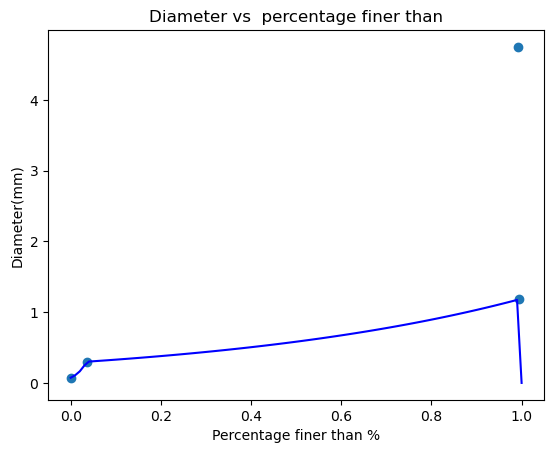

In [42]:
# Create the x and y values
x = sample['perc']
y = sample['dia_log']

# Create the spline
spl = make_interp_spline(x, y, k=1)  # type: BSpline

# Create the new x values
xnew = np.linspace(0, 1, 100)
ynew = np.exp(spl(xnew))
# ynew = spl(xnew)

# Plot the new values
plt.plot( xnew, ynew,'b')
#log scale for x axis
# plt.yscale('log')
plt.xlabel('Percentage finer than %')
plt.ylabel('Diameter(mm)')
plt.scatter(x,sample['dia'])
plt.title('Diameter vs  percentage finer than')
plt.show()

## Print out the D* values

In [43]:
ynew[10], ynew[16], ynew[25], ynew[50], ynew[65],ynew[75], ynew[84], ynew[90]

(0.32957723975567865,
 0.35938835433939087,
 0.40923633061799825,
 0.5870419426601368,
 0.7289304647104542,
 0.8421008025406018,
 0.9589020853935205,
 1.045637261534379)

In [44]:
print("D16 = ", ynew[16], ", D50 = ", ynew[50], ", D90 = ", ynew[90])

D16 =  0.35938835433939087 , D50 =  0.5870419426601368 , D90 =  1.045637261534379


In [53]:
df = pd.read_excel('../../data/SediNet-training.xlsx')
df

,objectid,ATT ID,ImageName,Name,Coin,d10,d16,d25,d50,d65,d75,d84,d90,mean,Latitude,Longitude
0,1.0,1,ATT1_Sediment_Playa_Villa_Pesquera_Patillas_Pu...,PR001,quarter,0.112616,0.122476,0.134806,0.166364,0.198882,0.226864,0.249914,0.322672,0.172041,17.973859,-65.988747
1,2.0,2,ATT2_20200531_151022.jpg,PR002,dime,0.428245,0.452165,0.490573,0.606101,0.654565,0.689009,0.749384,0.815557,0.589995,18.458983,-65.986842
2,3.0,3,ATT3_IMG_20200619_123813.jpg,LB06192020 Swash,quarter,1.198173,1.047530,0.856321,0.698469,0.655920,0.629003,0.605724,0.591365,0.762423,40.284599,-73.981407
3,4.0,4,ATT4_2471FF73-CE00-470D-97F8-9F4169EF5546.jpeg,DSS Fordune,quarter,0.271014,0.301965,0.342689,0.396260,0.434992,0.478633,0.521641,0.552439,0.396676,38.665109,-75.067763
4,5.0,5,ATT5_C7809DDB-E022-45EA-9559-EA3F86F35B4B.jpeg,DSS berm/beach,quarter,0.295353,0.337247,0.375598,0.497587,0.606495,0.679202,0.774394,0.887155,0.506516,38.665189,-75.067055
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,NaN,DK3,DK3_IMG_20200205_152945.jpg,"N. Indian River Inlet, DE Berm",quarter,0.216603,0.250342,0.289862,0.375094,0.401310,0.421517,0.484943,0.532444,0.357099,38.611033,-75.063257
66,NaN,DK4,DK4_IMG_20200205_153251.jpg,"N. Indian River Inlet, DE Dune Toe",quarter,0.266897,0.285153,0.314906,0.414869,0.474468,0.518180,0.560954,0.591414,0.404860,38.610892,-75.063450
67,213.0,DK5,DK5_IMG_20200205_153253.jpg,"N. Indian River Inlet, DE Dune Toe",quarter,0.266897,0.285153,0.314906,0.414869,0.474468,0.518180,0.560954,0.591414,0.404860,38.610892,-75.063450
68,215.0,DK6,DK6_IMG-0353.jpg,St Augustine Berm,quarter,0.199286,0.220408,0.243697,0.339142,0.397277,0.465445,0.574513,0.669973,0.350189,29.854100,-81.264700


In [156]:

#grab only the columns of df_merged that start with 'd' and is followed by a number
sieve_df = df.filter(regex='^d\d+$')

#rename the columns of sieve_df to be the number that follows 'd'
sieve_df.columns = sieve_df.columns.str.replace('d', '')
sample = pd.DataFrame(sieve_df.iloc[5]).copy()
sample
sample.columns = ['d']
sample.index.name = 'percentage'
sample['percentage'] = sample.index.astype(float)
sample = sample.reset_index(drop=True)
sample



,d,percentage
0,0.267993,10.0
1,0.307443,16.0
2,0.361525,25.0
3,0.483608,50.0
4,0.614146,65.0
5,0.704910,75.0
6,0.810521,84.0
7,0.978358,90.0


In [56]:
%load_ext autoreload
%autoreload 2
import sys  
sys.path.insert(0, '../../lib/')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [109]:
%reload_ext autoreload
import sand_classification as sc

In [157]:
d = sc.std_sieves['d']
fm = sc.get_FM(sample)
# add a row to sample with d=0 and percentage=0 as the first row
# sample = sample.append({'d':0, 'percentage':0}, ignore_index=True)
sample = sample.sort_values(by='d',ascending=True).reset_index(drop=True)
sample



,d,percentage
0,0.267993,10.0
1,0.307443,16.0
2,0.361525,25.0
3,0.483608,50.0
4,0.614146,65.0
5,0.704910,75.0
6,0.810521,84.0
7,0.978358,90.0


In [163]:
fm = sc.get_FM(sample,'interp')
fm

0    100.000000
1      0.000000
2      0.000000
3     84.832826
4     63.586205
5     14.871989
6      0.000000
dtype: float64

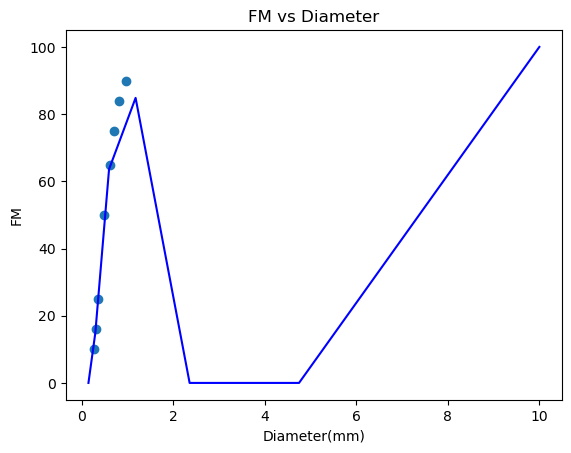

In [164]:
#plot fm v/s d
plt.plot(d, fm, 'b')
plt.xlabel('Diameter(mm)')
plt.ylabel('FM')
plt.title('FM vs Diameter')
#set the maximum value of x axis to 1
# plt.xlim(0, 1)
plt.scatter(sample['d'], sample['percentage'])
plt.show()

In [82]:
sample

,d,percentage
0,0.428245,10.0
1,0.452165,16.0
2,0.490573,25.0
3,0.606101,50.0
4,0.654565,65.0
5,0.689009,75.0
6,0.749384,84.0
7,0.815557,90.0


In [142]:
_,_,grid = sc.get_grid_sieves(sample)

In [105]:
grid.iloc[0]

100.0

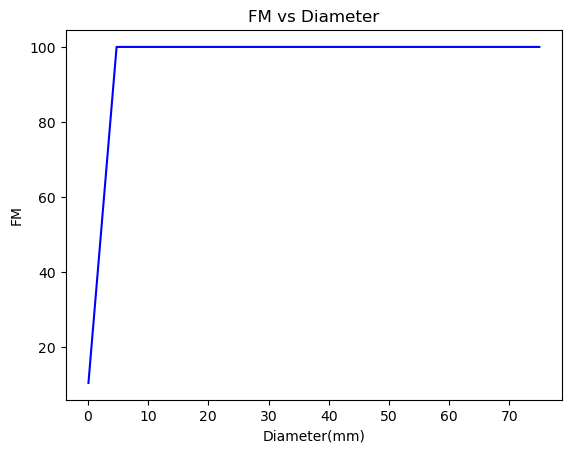

In [143]:
plt.plot(sc.grid_sieves['d'], grid, 'b')
plt.xlabel('Diameter(mm)')
plt.ylabel('FM')
plt.title('FM vs Diameter')
plt.show()

In [106]:
sample_D75, sample_D4_75, sample_D_075 = grid.iloc[0], grid.iloc[1], grid.iloc[2]
sample_D75, sample_D4_75, sample_D_075

(100.0, 100.0, 44.37363370006608)